In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


8


In [2]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [3]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [4]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.2022 - acc: 0.9383
Epoch 2/10
60000/60000 [==============================] - 26s 431us/step - loss: 0.0815 - acc: 0.9751
Epoch 3/10
60000/60000 [==============================] - 26s 428us/step - loss: 0.0568 - acc: 0.9820
Epoch 4/10
60000/60000 [==============================] - 26s 429us/step - loss: 0.0416 - acc: 0.98670s - loss: 0.0417 - acc: 0.986
Epoch 5/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0358 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 26s 429us/step - loss: 0.0273 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.0243 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 28s 462us/step - loss: 0.0203 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0207 - acc: 0.99301s - 

In [5]:

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 111us/step


[0.048300632464270896, 0.9867]

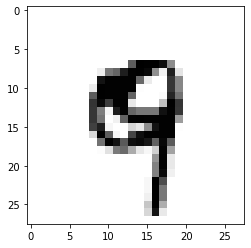

9


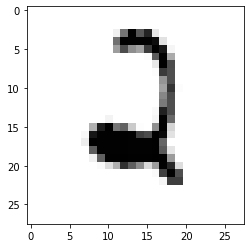

2


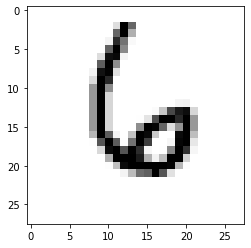

6


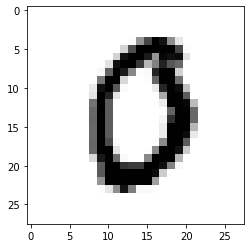

0


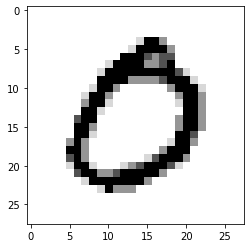

0


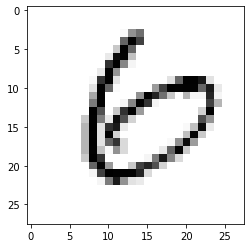

6


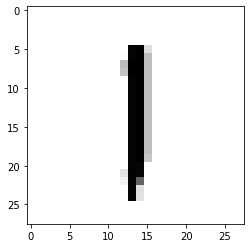

1


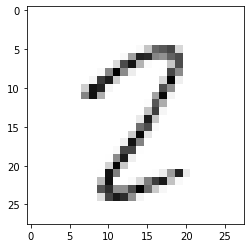

2


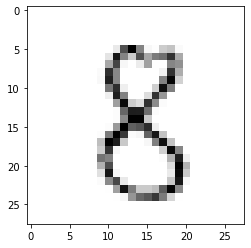

8


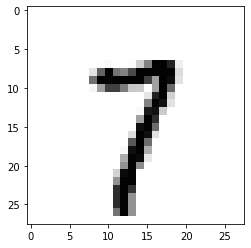

7


In [13]:

image_index = 4444

for i in range(image_index, image_index + 10):
    plt.imshow(x_test[i].reshape(28, 28),cmap='Greys')
    plt.show()
    pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
    print(pred.argmax())